In [4]:
import boto3
import json

# Create an S3 client
s3_client = boto3.client('s3')

# Specify the bucket name and object key (file name)
bucket_name = 'aws-ds-training-bucket'
object_key = 'Input_data'

# Get the object from S3
response = s3_client.get_object(Bucket=bucket_name, Key=object_key)

# Read the contents of the object
data = response['Body'].read()

# Decode the data if necessary (assuming it's a text file)
decoded_data = data.decode('utf-8')

# Process the data
decoded_data

'Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price\r\n0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832\r\n1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232\r\n2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636\r\n3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.336\r\n4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.808\r\n5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312\r\n6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Ir

In [8]:
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format',lambda x:"%0.5f" %x)
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

In [13]:
csv_data = StringIO(decoded_data)

data = pd.read_csv(csv_data)
df = pd.DataFrame(data)

df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.00000,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.68320
1,1.00000,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.52320
2,2.00000,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.00000
3,3.00000,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.33600
4,4.00000,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.80800


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [14]:
df.shape

(1303, 12)

In [15]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [17]:
#Dropping the unnamed column

df.drop(columns='Unnamed: 0',inplace=True)

In [18]:
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [19]:
df[df['Company'].isnull()]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df[df.duplicated()]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#since the duplicates and the na values are the same, removing the duplicates will remove nulll values

df.drop_duplicates(inplace=True)

In [25]:
df.isnull().sum()

Company             1
TypeName            1
Inches              1
ScreenResolution    1
Cpu                 1
Ram                 1
Memory              1
Gpu                 1
OpSys               1
Weight              1
Price               1
dtype: int64

In [26]:
df[df['Memory'].isnull()]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df.drop(index=20,inplace=True)

In [28]:
df.shape

(1244, 11)

In [29]:
df.reset_index(drop=True,inplace=True)

### Data Cleaning

1.There is no independent company as such 'Vero', replacing it with 'Aspire'

2.Dropping "?" values in Inches column and converting its datatype to float

3.Extrating the screen resolution values

4.From cpu column we are going to extract only processing speeds and convert its datatype to float

5.The column Ram is converted to integer datatype

6.From Memory column, two columns are created, One is Storage Type and another is Rom values.

7.Dropping '?' values from the Weight column and converting the datatype to float.

In [31]:
#printing the unique values for all the columns
d={}
for i in df.columns:
    d[i]=df[i].unique()
d

{'Company': array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
        'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
        'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object),
 'TypeName': array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
        'Workstation', 'Netbook'], dtype=object),
 'Inches': array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
        '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
        '33.5', '?', '31.6', '17', '15', '14.1', '11.3', '10.1'],
       dtype=object),
 'ScreenResolution': array(['IPS Panel Retina Display 2560x1600', '1440x900',
        'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
        '1366x768', 'IPS Panel Full HD 1920x1080',
        'IPS Panel Retina Display 2304x1440',
        'IPS Panel Full HD / Touchscreen 1920x1080',
        'Full HD / Touchscreen 1920x1080',
        'Touchscreen / Quad HD+ 3200x1800', 'Touchscreen 2256x1504

In [32]:
#As there is no independent company named Vero but its parent is aspire, we will be renaming any location where Vero is present to Aspire.

df['Company']=df['Company'].apply(lambda x: "Aspire" if x =='Vero' else x)

In [33]:
# "?" is present in inches column, droppping those rows
df.drop(index=df[df['Inches']=='?'].index[0],inplace=True)

In [35]:
#clean the screen resolution column by extracting only resolution values
df['ScreenResolution'] = df['ScreenResolution'].str.split().str[-1]

In [36]:
#clean the cpu column
#from cpu column we are going to extract only processing speeds

df['ProcessSpeed'] = df['Cpu'].str.split().str[-1].str[:-3].astype(float)

In [37]:
#deleting the cpu column as processing speeds column is created
df.drop(columns='Cpu',inplace=True)

In [38]:
#cleaning ram column, by changing its datatype to int
df['Ram'] = df['Ram'].str[:-2].astype(int)

In [39]:
#cleaning memory column
#we are going to create 2 columns, one as storage type and rom  
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [40]:
#first we need to remove the "?" values in memory column
df.drop(index=df[df['Memory']=="?"].index[0],inplace=True)

In [41]:
#extracting only the rom values and replacing 1TB with 1000GB, and converting into int datatype

df['Rom(GB)'] = df['Memory'].str.split().str[0].str[:-2].replace({"1":"1000", "1.0":"1000", "2":"2000"}).astype(int)

In [42]:
#extracting the storage type value (flash,hdd,ssd,hybrid) from memory column

df['StorageType'] = df['Memory'].str.split().str[1]

In [43]:
#dropping the memory column as we have derived 2 more columns from it
df.drop(columns='Memory',inplace=True)

In [ ]:
#we do not require GPU column for our analysis
df.drop(columns='Gpu',inplace=True)

In [46]:
#cleaning weight column by remove the '?' rows and converting the datatype to float

df.drop(index=df[df['Weight']=="?"].index[0],inplace=True)
df['Weight'] = df['Weight'].str[:-2].astype(float)

In [47]:
#converting the inches column to float as there are continues value
df['Inches']=df['Inches'].astype('float')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1241 entries, 0 to 1243
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1241 non-null   object 
 1   TypeName          1241 non-null   object 
 2   Inches            1241 non-null   float64
 3   ScreenResolution  1241 non-null   object 
 4   Ram               1241 non-null   int32  
 5   OpSys             1241 non-null   object 
 6   Weight            1241 non-null   float64
 7   Price             1241 non-null   float64
 8   ProcessSpeed      1241 non-null   float64
 9   Rom(GB)           1241 non-null   int32  
 10  StorageType       1241 non-null   object 
dtypes: float64(4), int32(2), object(5)
memory usage: 106.6+ KB


In [49]:
#converting the cleaned data frame to a csv file and storing it to the s3 bucket for Documentation

csv_buffer = df.to_csv(index=False)
s3 = boto3.resource('s3')
s3.Object(bucket_name, 'output_data').put(Body=csv_buffer)

print("CSV file saved to S3 bucket!")

CSV file saved to S3 bucket!


In [50]:
#saving it in local to

df.to_csv('Cleaned_laptop_data.csv', index=False)

print("CSV file saved locally!")

CSV file saved locally!


### Data Visualization and Analysis

1.Which is the most used storage type in the dataset

2.Which company sells the highest price laptop

3.Count of ultrabooks in affordable range ie, below 40,000

4.How does the weight of laptops affect their price?

5.What is the most common operating system used in laptops with screen size of 15.6 inches and a resolution of 1920x1080?

6.How does the type of laptop affect its price?

7.Which company offers the most lightweight laptops on average?

8.What is the most common combination of Ram and Rom in laptops with a processor speed 2.5Ghz?

<Figure size 1200x500 with 0 Axes>

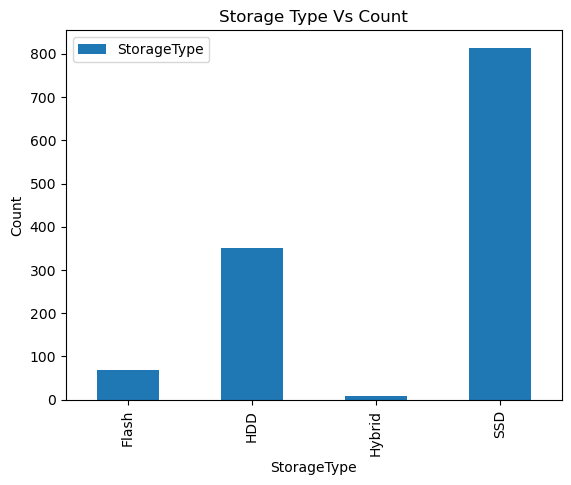

In [52]:
#1.which is the most used storage type in the dataset
#Ans SSD
plt.figure(figsize=(12,5))
df.groupby(by='StorageType')[['StorageType']].count().plot(kind='bar')
plt.title("Storage Type Vs Count")
plt.ylabel("Count")
plt.show();

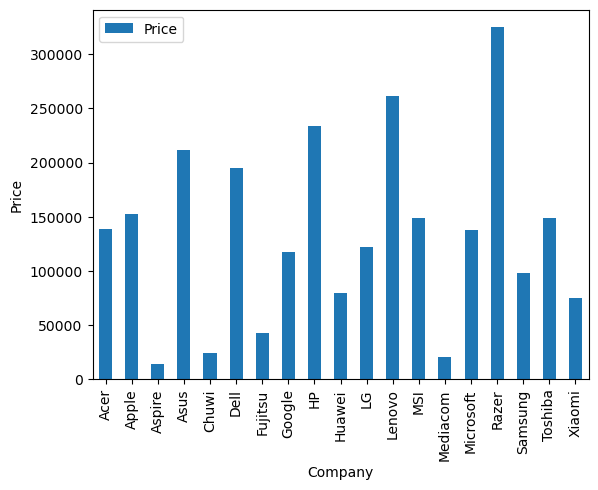

In [53]:
#2.which company sells the highest price laptop
#Ans Razer
df.groupby(by='Company')[['Price']].max().plot(kind='bar')
plt.ylabel("Price")
plt.show()

In [56]:
#3.Count of ultrabooks in affordable range ie, below $40,000
print("Count of ultrabooks in affordable range is, below $40,000 is",len(df[(df['TypeName']=='Ultrabook')&(df['Price']<=40000)]))

Count of ultrabooks in affordable range is, below $40,000 is 5


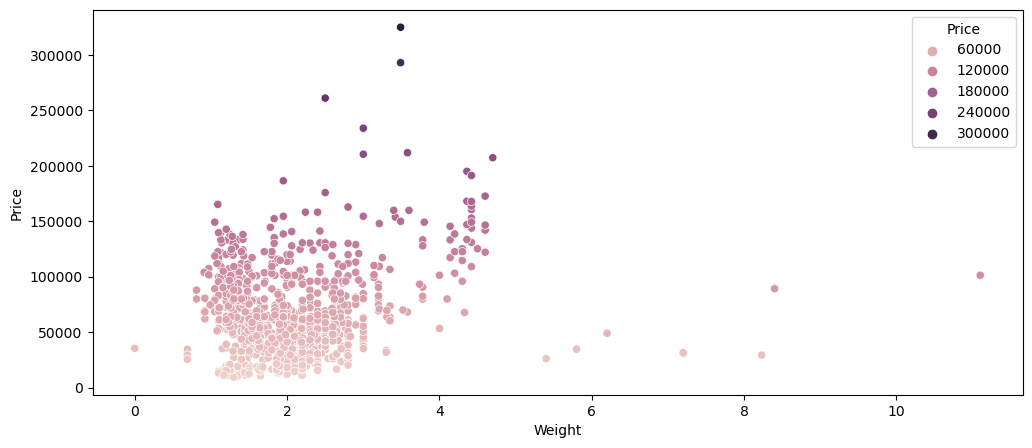

In [57]:
#4.How does the weight of laptops affect their price?
plt.figure(figsize=(12,5))
sns.scatterplot(data=df,x="Weight",y="Price",hue="Price")
plt.show()

### Inference:
1.The lightweight laptops are of cheaper price.

<Figure size 1200x500 with 0 Axes>

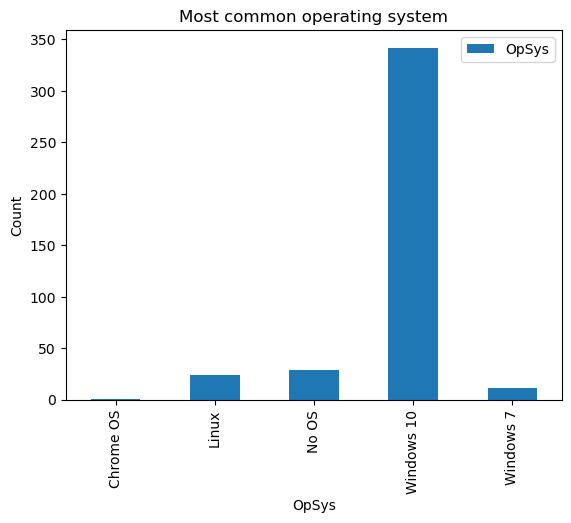

In [58]:
#5.What is the most common operating system used in laptops with a screen size of 15.6 inches and a resolution of 1920x1080?
#Ans Windows 10
plt.figure(figsize=(12,5))
df[(df['Inches']==15.6)&(df['ScreenResolution']=='1920x1080')].groupby(by='OpSys')[['OpSys']].count().plot(kind='bar')
plt.title("Most common operating system")
plt.ylabel("Count")
plt.show();

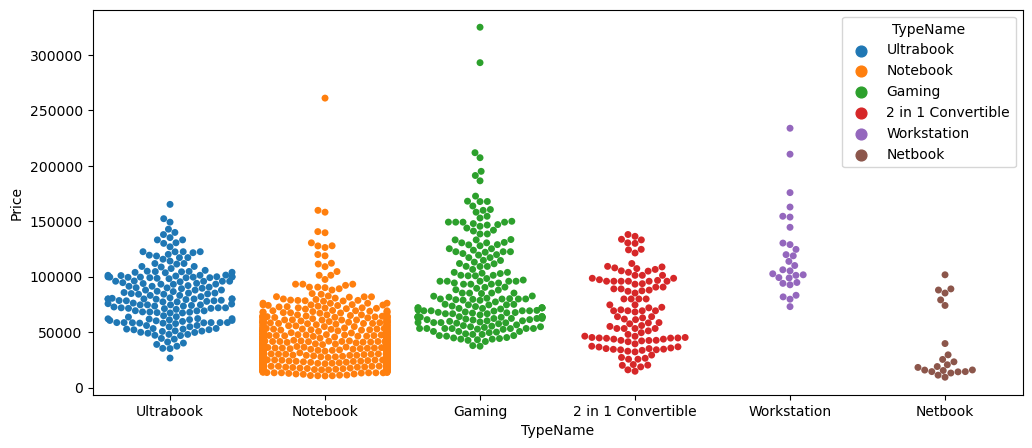

In [59]:
#6.How does the type of laptop affect its price?
plt.figure(figsize=(12,5))
sns.swarmplot(data=df,x=df['TypeName'],y=df['Price'],hue=df['TypeName'])
plt.show()

### Inference:

1.Laptop type notebook has the most number of affordable range laptops

2.The price of gaming laptops are of higher range when compared to other types

<Figure size 1200x500 with 0 Axes>

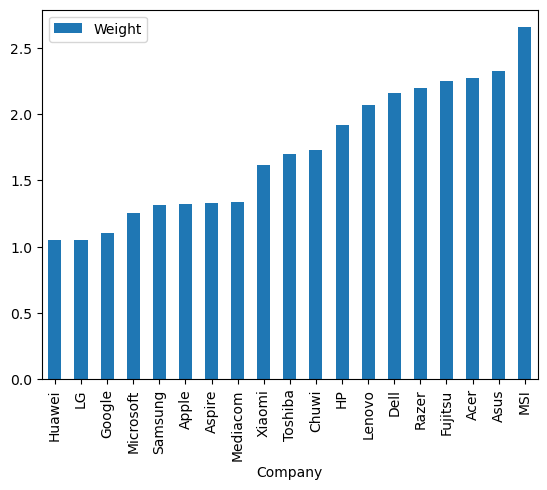

In [60]:
#7.Which company offers the most lightweight laptops on average?
#Ans Huawei
plt.figure(figsize=(12,5))
df.groupby(by='Company')[['Weight']].mean().sort_values(by="Weight").plot(kind='bar')
plt.show()

<AxesSubplot:xlabel='Ram,Rom(GB)'>

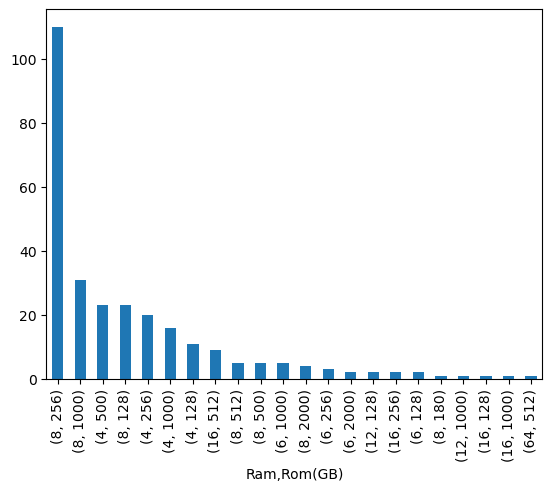

In [61]:
#8.What is the most common combination of Ram and Rom in 
#laptops with a processor speed 2.5Ghz?
#Ans 8gb ram and 256gb rom
df[df['ProcessSpeed']==2.5][['Ram','Rom(GB)']].value_counts().plot(kind='bar')

In [62]:
#creating list of categorical column names for encoding
catcols=df.select_dtypes(include=object).columns
catcols

Index(['Company', 'TypeName', 'ScreenResolution', 'OpSys', 'StorageType'], dtype='object')

In [63]:
df['ScreenResolution'].nunique(),df['Company'].nunique(),df['TypeName'].nunique(),df['OpSys'].nunique(),df['StorageType'].nunique()

(15, 19, 6, 9, 4)

### Linear Regression
1.Firstly the categorical columns will be encoded with OrdinalEncoder from sklearn and changing its datatype to integer

2.Split the data into 75% train dataset and 25% test dataset and perform linear regression

3.Fit the train dataset into the model and calculte the root mean squared error of the test dataset.

4.The Accuracy is 62.1%

5.Using the stats model module we will be doing weight analysis and conclude the most significant features affecting the price of the laptop.

In [64]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [65]:
df[catcols]=oe.fit_transform(df[catcols])

In [66]:
df[catcols]=df[catcols].astype('int')

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [68]:
li=LinearRegression()

In [69]:
X,y=df.drop(columns='Price'),df['Price']

In [70]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=555)

In [71]:
model=li.fit(X_train,y_train)

In [72]:
print("The score of the model with all independent variables is:",model.score(X_test,y_test)*100,"%")

The score of the model with all independent variables is: 62.1813359072383 %


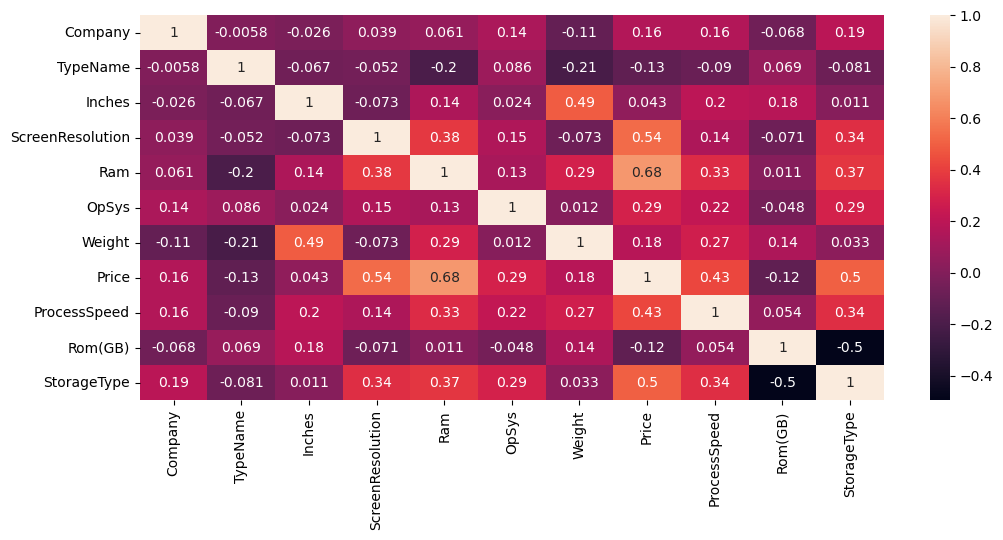

In [73]:
#Process of improving the model, finding the highly correlated columns with price
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [74]:
train=pd.concat((X_train,y_train),axis='columns')
test=pd.concat((X_test,y_test),axis='columns')

In [75]:
#the most correlated independent values to price are 'StorageType', 'ProcessSpeed', 'Ram', 'ScreenResolution' with these values lets find
#out the rsquare value of the test dataset
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [76]:
model1=smf.ols(data=train,formula='Price~StorageType+ProcessSpeed+Ram+ScreenResolution').fit()

In [77]:
y_pred1=model1.predict(test)

In [78]:
print("The score of the model with 'StorageType', 'ProcessSpeed', 'Ram', 'ScreenResolution' as independent variables:",r2_score(test['Price'], y_pred1)*100,"%")

The score of the model with 'StorageType', 'ProcessSpeed', 'Ram', 'ScreenResolution' as independent variables: 60.86078744031498 %


In [79]:
#the most correlated independent values to price are 'StorageType', 'Ram', 'ScreenResolution' with these values lets find
#out the rsquare value of the test dataset

In [80]:
model2=smf.ols(data=train,formula='Price~StorageType+Ram+ScreenResolution').fit()

In [81]:
y_pred2=model2.predict(test)

In [82]:
print("The score of the model with 'StorageType', Ram', 'ScreenResolution' independent variables is:",r2_score(test['Price'], y_pred2)*100,"%")

The score of the model with 'StorageType', Ram', 'ScreenResolution' independent variables is: 56.34880418761221 %


In [83]:
#the most correlated independent values to price are 'Ram', 'ScreenResolution' with these values lets find
#out the rsquare value of the test dataset

In [84]:
model3=smf.ols(data=train,formula='Price~Ram+ScreenResolution').fit()

In [85]:
y_pred3=model3.predict(test)

In [86]:
print("The score of the model with 'Ram', 'ScreenResolution' independent variables is:",r2_score(test['Price'], y_pred3)*100,"%")

The score of the model with 'Ram', 'ScreenResolution' independent variables is: 53.473316778795024 %


The features which affects the price most significantly compared to other features are Ram and Screen Resolution